In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import norm
from scipy.stats import pearsonr
from scipy.stats import mannwhitneyu
from scipy.stats import t

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import accuracy_score, classification_report

from scipy import stats
from sklearn.decomposition import PCA

import random

In [ ]:
# Load the data from the CSV file

from google.colab import files

uploaded = files.upload()
df = pd.read_csv('spotify52kData.csv')

In [ ]:
df.reset_index(drop=True)

,songNumber,artists,album_name,track_name,popularity,duration,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.03220,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.92400,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.21000,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.90500,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.46900,0.000000,0.0829,0.167,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51995,51995,Don Omar;Trebol Clan,Perreo Tenebroso Vol. 3,Tu Cuerpo Me Arrebata,0,203653,False,0.819,0.6450,10,-6.707,0,0.0481,0.23200,0.000863,0.1780,0.724,94.998,4,hip-hop
51996,51996,Don Omar,Feliz Cumpleaños con Perreo,Dale Don Dale,1,212413,False,0.831,0.8180,2,-7.827,1,0.0824,0.02450,0.000319,0.0892,0.819,95.022,4,hip-hop
51997,51997,Don Omar,Última Misión Reggaeton,Dale Don Dale,0,212413,False,0.831,0.8180,2,-7.827,1,0.0824,0.02450,0.000319,0.0892,0.819,95.022,4,hip-hop
51998,51998,Moneybagg Yo;Pooh Shiesty;Lil Durk;EST Gee,Energy Hip Hop,Switches & Dracs,0,168620,True,0.727,0.6470,11,-7.383,0,0.2800,0.03290,0.000000,0.2460,0.529,159.959,4,hip-hop


In [ ]:
print(df.columns)

Index(['songNumber', 'artists', 'album_name', 'track_name', 'popularity',
       'duration', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre'],
      dtype='object')


Display the Columns: Print out the columns of the DataFrame to see the features available in the dataset.

In [ ]:
print(df.head())

   songNumber                 artists  \
0           0             Gen Hoshino   
1           1            Ben Woodward   
2           2  Ingrid Michaelson;ZAYN   
3           3            Kina Grannis   
4           4        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration  explicit  danceability  \
0                      Comedy          73    230666     False         0.676   
1            Ghost - Acoustic          55    149610     False         0.420   
2              To Begin Again          57    210826     False         0.438   
3  Can't Help Falling In Love          71    201933     False         0.266   
4                    

Display the First Few Rows: Use the head() method to display the first few rows of the DataFrame.

In [ ]:
print(df.dtypes)

songNumber            int64
artists              object
album_name           object
track_name           object
popularity            int64
duration              int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
dtype: object


In [ ]:
df.describe()

,songNumber,popularity,duration,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,is_classical
count,52000.000000,52000.000000,5.200000e+04,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000
mean,25999.500000,33.115923,2.302998e+05,0.563900,0.668259,5.348442,-7.972804,0.622904,0.095864,0.271442,0.182884,0.212527,0.451814,123.558120,3.916308,0.019231
std,15011.251336,21.743697,1.176823e+05,0.176573,0.249585,3.562600,4.919127,0.484664,0.131501,0.322322,0.325275,0.187986,0.255314,29.242142,0.400671,0.137336
min,0.000000,0.000000,1.745300e+04,0.000000,0.000020,0.000000,-42.044000,0.000000,0.000000,0.000000,0.000000,0.011200,0.000000,0.000000,0.000000,0.000000
25%,12999.750000,18.000000,1.739470e+05,0.447000,0.508000,2.000000,-9.578000,0.000000,0.036800,0.007260,0.000000,0.097200,0.238000,100.979000,4.000000,0.000000
50%,25999.500000,33.000000,2.135460e+05,0.574000,0.717000,6.000000,-6.696000,1.000000,0.051200,0.106000,0.000161,0.132000,0.431000,123.366000,4.000000,0.000000
75%,38999.250000,50.000000,2.651962e+05,0.696000,0.877000,9.000000,-4.849000,1.000000,0.093000,0.499000,0.168000,0.275000,0.653000,141.944000,4.000000,0.000000
max,51999.000000,100.000000,4.789026e+06,0.983000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,0.997000,0.995000,0.995000,243.372000,5.000000,1.000000


In [ ]:
# Check for missing values in the entire DataFrame
missing_values = df.isnull().sum()

1) Consider the 10 song features duration, danceability, energy, loudness, speechiness, acousticness, instrumentalness, liveness, valence and tempo. Is any of these features reasonably distributed normally? If so, which one? [Suggestion: Include a 2x5 figure with histograms for each feature)

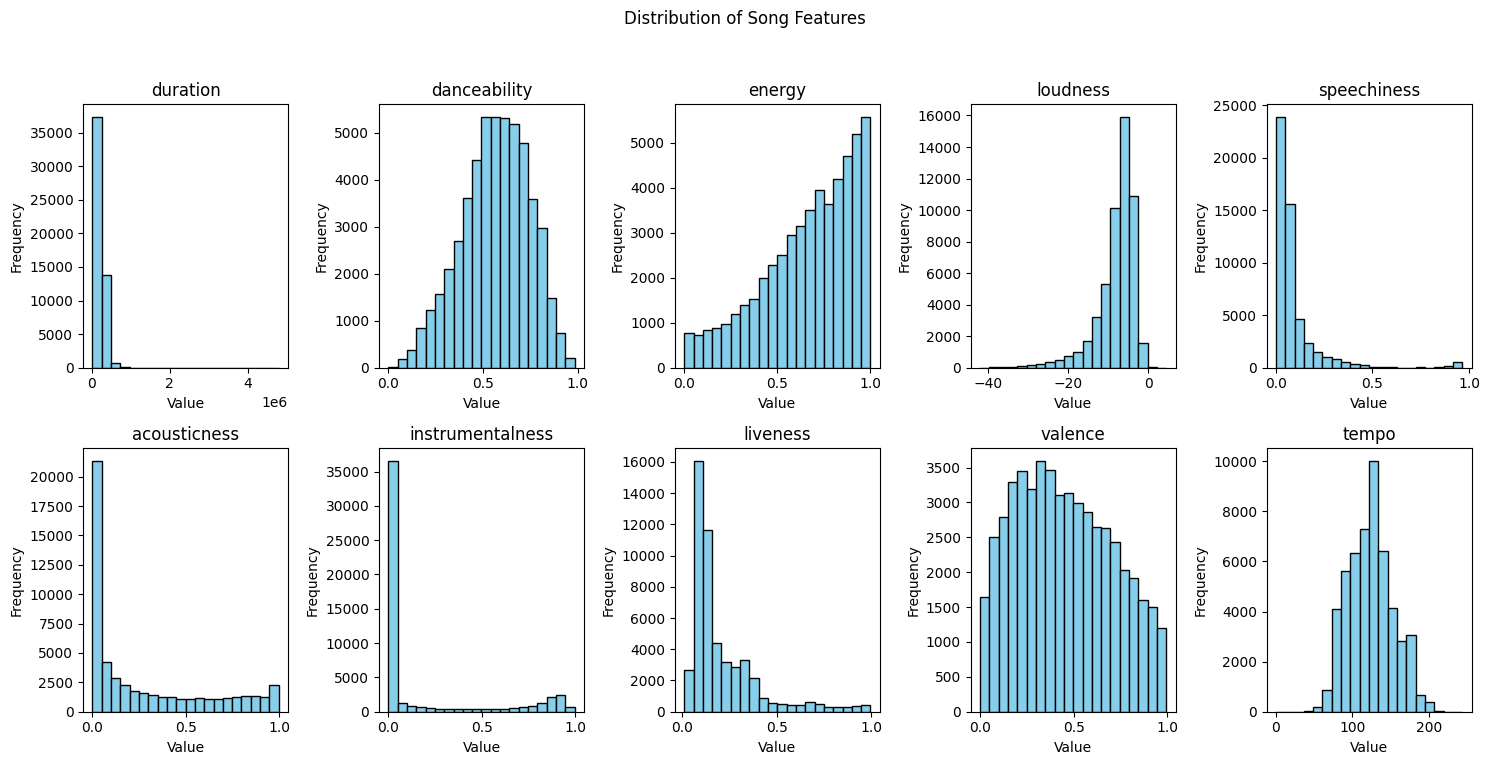

In [ ]:
# Select the columns corresponding to the song features
features = ['duration', 'danceability', 'energy', 'loudness', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# Create subplots for histograms
fig, axs = plt.subplots(2, 5, figsize=(15, 8))
axs = axs.flatten()  # Flatten the 2D array for easier indexing

# Plot histograms for each feature
for i, feature in enumerate(features):
    axs[i].hist(df[feature], bins=20, color='skyblue', edgecolor='black')
    axs[i].set_title(feature)
    axs[i].set_xlabel('Value')
    axs[i].set_ylabel('Frequency')

# Add main title
fig.suptitle('Distribution of Song Features')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

2) Is there a relationship between song length and popularity of a song? If so, if the relationship
positive or negative? [Suggestion: Include a scatterplot]

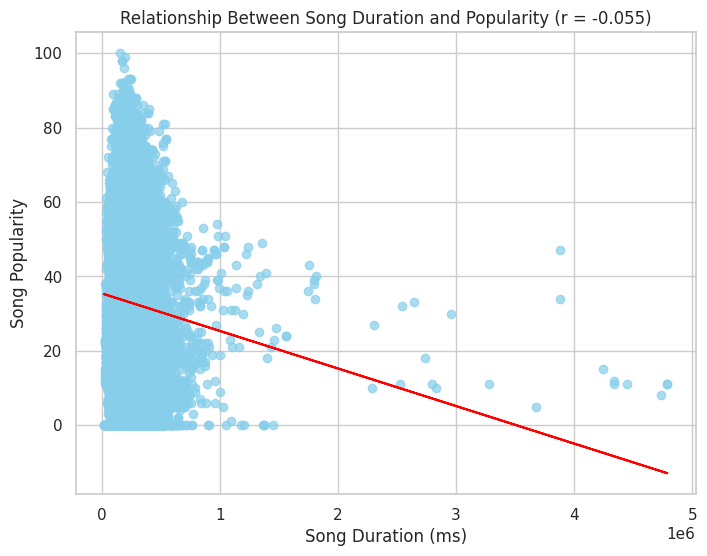

In [ ]:
# Find the column indices for 'duration' and 'popularity'
duration_col_index = df.columns.get_loc('duration')
popularity_col_index = df.columns.get_loc('popularity')

# Calculate the Pearson correlation coefficient
r = np.corrcoef(df.iloc[:, duration_col_index], df.iloc[:, popularity_col_index])

# Visualize the relationship with a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df.iloc[:, duration_col_index], df.iloc[:, popularity_col_index], color='skyblue', alpha=0.7)
plt.xlabel('Song Duration (ms)')
plt.ylabel('Song Popularity')
plt.title('Relationship Between Song Duration and Popularity (r = {:.3f})'.format(r[0, 1]))
plt.grid(True)

# Fit a linear regression line
line = np.polyfit(df.iloc[:, duration_col_index], df.iloc[:, popularity_col_index], 1)
p = np.poly1d(line)
plt.plot(df.iloc[:, duration_col_index], p(df.iloc[:, duration_col_index]), color='red', linestyle='-')

plt.show()

3) Are explicitly rated songs more popular than songs that are not explicit? [Suggestion: Do a
suitable significance test, be it parametric, non-parametric or permutation]

In [ ]:
# Separate the data into two groups based on whether the song is explicit or not
explicit_songs = df[df['explicit'] == True]['popularity']
non_explicit_songs = df[df['explicit'] == False]['popularity']

# Perform Mann-Whitney U test
statistic, p_value = mannwhitneyu(explicit_songs, non_explicit_songs)

# Print the results
print("Mann-Whitney U Test Results:")
print("Statistic:", statistic)
print("p-value:", p_value)

# Interpret the results
if p_value < 0.05:
    print("Result: Reject the null hypothesis. There is a significant difference in popularity between explicitly rated and non-explicitly rated songs.")
else:
    print("Result: Fail to reject the null hypothesis. There is no significant difference in popularity between explicitly rated and non-explicitly rated songs.")

Mann-Whitney U Test Results:
Statistic: 139361273.5
p-value: 3.0679199339114678e-19
Result: Reject the null hypothesis. There is a significant difference in popularity between explicitly rated and non-explicitly rated songs.


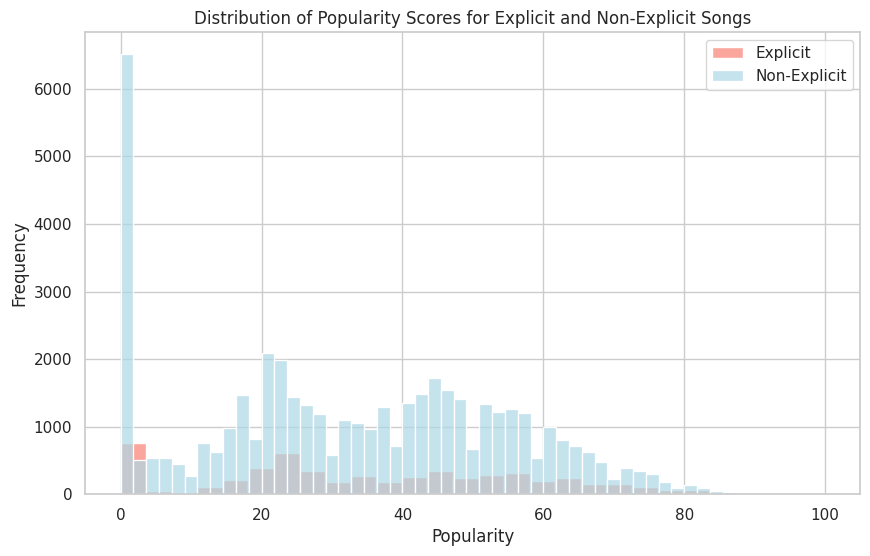

In [ ]:
import seaborn as sns

# Set the style of the seaborn plots
sns.set(style="whitegrid")

# Plot the distributions of popularity scores for explicit and non-explicit songs
plt.figure(figsize=(10, 6))
sns.histplot(explicit_songs, color='salmon', label='Explicit', kde=False, alpha=0.7)
sns.histplot(non_explicit_songs, color='lightblue', label='Non-Explicit', kde=False, alpha=0.7)
plt.title('Distribution of Popularity Scores for Explicit and Non-Explicit Songs')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.legend()
plt.show()

4) Are songs in major key more popular than songs in minor key? [Suggestion: Do a suitable significance test, be it parametric, non-parametric or permutation]

In [ ]:
# Extract popularity data for songs in minor key (mode = 0) and major key (mode = 1)
popularity_minor_key = df[df['mode'] == 0]['popularity']
popularity_major_key = df[df['mode'] == 1]['popularity']

# Perform Mann-Whitney U test
statistic, p_value = mannwhitneyu(popularity_minor_key, popularity_major_key)

# Print the results
print("Mann-Whitney U Test Results:")
print("Statistic:", statistic)
print("p-value:", p_value)

# Interpret the results
if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant difference in popularity between songs in minor and major keys.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in popularity between songs in minor and major keys.")

Mann-Whitney U Test Results:
Statistic: 325452746.0
p-value: 2.0175287554899416e-06
Reject the null hypothesis. There is a significant difference in popularity between songs in minor and major keys.


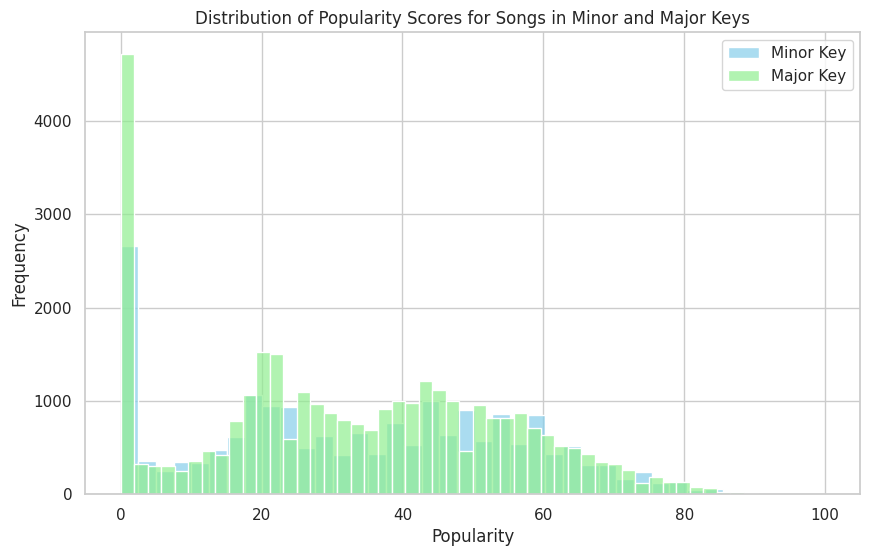

In [ ]:
import seaborn as sns

sns.set(style="whitegrid")

# Plot the distributions of popularity scores for songs in minor and major keys
plt.figure(figsize=(10, 6))
sns.histplot(popularity_minor_key, color='skyblue', label='Minor Key', kde=False, alpha=0.7)
sns.histplot(popularity_major_key, color='lightgreen', label='Major Key', kde=False, alpha=0.7)
plt.title('Distribution of Popularity Scores for Songs in Minor and Major Keys')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.legend()
plt.show()

5. Energy is believed to largely reflect the “loudness” of a song. Can you substantiate (or refute) that this is the case? [Suggestion: Include a scatterplot]

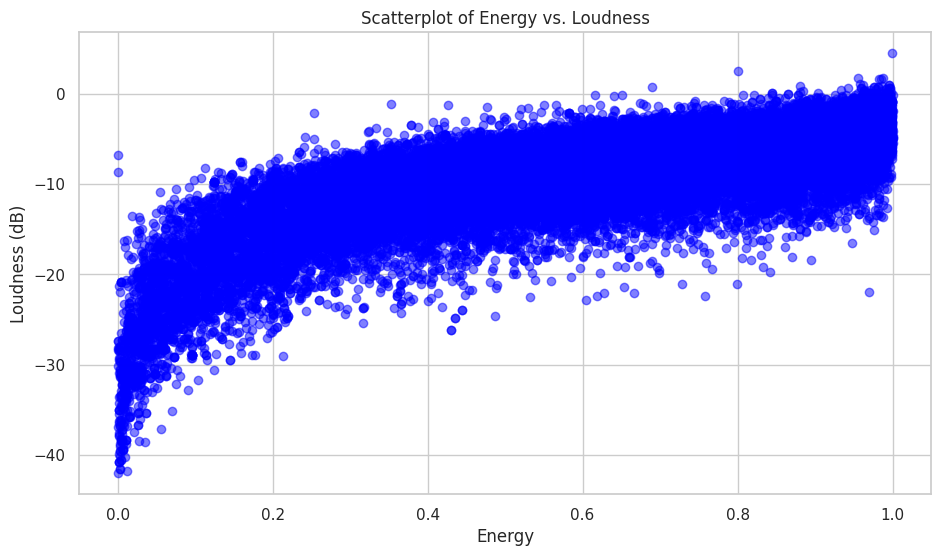

Correlation Coefficient: 0.7748808291850185


In [ ]:
# Plotting a scatterplot of energy vs. loudness
plt.figure(figsize=(11, 6))
plt.scatter(df['energy'], df['loudness'], color='blue', alpha=0.5)
plt.xlabel('Energy')
plt.ylabel('Loudness (dB)')
plt.title('Scatterplot of Energy vs. Loudness')
plt.grid(True)
plt.show()

# Calculate the correlation coefficient between energy and loudness
correlation_coefficient = np.corrcoef(df['energy'], df['loudness'])[0, 1]
print("Correlation Coefficient:", correlation_coefficient)

6) Which of the 10 individual (single) song features from question 1 predicts popularity best? How good is this “best” model?

In [ ]:
features = ['duration', 'danceability', 'energy', 'loudness', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
target = 'popularity'

# Iterate through each feature and train a linear regression model
for feature in features:
    X = df[[feature]]  # Select the current feature
    y = df[target]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Evaluate the model
    score = model.score(X_test, y_test)
    print(f"R-squared score for {feature}: {score}")

correlation_coefficients = {}

# Calculate correlation coefficient for each feature
for feature in features:
    correlation_coefficient = df[feature].corr(df[target])
    correlation_coefficients[feature] = correlation_coefficient

# Print correlation coefficients
for feature, coefficient in correlation_coefficients.items():
    print(f"Correlation coefficient between '{feature}' and 'popularity': {coefficient}")

R-squared score for duration: 0.003756891592990752
R-squared score for danceability: 0.001977090862231079
R-squared score for energy: 0.004449112036058356
R-squared score for loudness: 0.002849207560424505
R-squared score for speechiness: 0.0020563842530981757
R-squared score for acousticness: 0.0011416615545840614
R-squared score for instrumentalness: 0.02110466494367702
R-squared score for liveness: 0.0013590571693934406
R-squared score for valence: 0.001980538981427471
R-squared score for tempo: 1.4633492949056581e-05
Correlation coefficient between 'duration' and 'popularity': -0.05465119593637638
Correlation coefficient between 'danceability' and 'popularity': 0.03715781135740383
Correlation coefficient between 'energy' and 'popularity': -0.05592469066526968
Correlation coefficient between 'loudness' and 'popularity': 0.06021003481482004
Correlation coefficient between 'speechiness' and 'popularity': -0.04853267708421366
Correlation coefficient between 'acousticness' and 'populari

In [ ]:
# Define the features and target variable
features = ['duration', 'danceability', 'energy', 'loudness', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
target = 'popularity'

# Initialize variables to store results
best_feature = None
max_r_squared = -np.inf
rmse = np.inf
coefficients = None
intercept = None

# Iterate through each feature and train a linear regression model
for feature in features:
    X = df[[feature]]  # Select the current feature
    y = df[target]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Evaluate the model
    r_squared = model.score(X_test, y_test)
    y_pred_popularity = model.predict(X_test)
    current_rmse = np.sqrt(mean_squared_error(y_test, y_pred_popularity))

    # Find the feature with the maximum absolute correlation coefficient
    max_corr_feature = max(correlation_coefficients, key=lambda x: abs(correlation_coefficients[x]))
    max_corr_coefficient = correlation_coefficients[max_corr_feature]

# Check if the current feature has the highest R-squared
if r_squared > max_r_squared:
  max_r_squared = r_squared
  best_feature = feature
  rmse = current_rmse
  coefficients = model.coef_
  intercept = model.intercept_

# Print the results
print(f"Best feature predicting popularity: {best_feature}")
print(f"Max R-squared: {max_r_squared}")
print(f"RMSE: {rmse}")
print(f"Coefficients: {coefficients}")
print(f"Intercept: {intercept}")
print(f"CorrelationCoeff: {max_corr_coefficient}")

Best feature predicting popularity: instrumentalness
Max R-squared: 0.02110466494367702
RMSE: 21.456607642834474
Coefficients: [-9.66461854]
Intercept: 34.88710471577177
CorrelationCoeff: -0.14497227053733283


7) Building a model that uses all of the song features in question 1, how well can you predict popularity?
How much (if at all) is this model improved compared to the model in question 7).
How do you account for this?

In [ ]:
X = df[features]
y = df["popularity"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model

test_preds = model.predict(X_test)

test_r2 = r2_score(y_test, test_preds)

test_rmse = np.sqrt(mean_squared_error(y_test, test_preds))

print("Test R-squared:", test_r2)
print("Test RMSE:", test_rmse)

Test R-squared: 0.05235411982671212
Test RMSE: 21.111348243501684


8. When considering the 10 song features above, how many meaningful principal components can you extract? What proportion of the variance do these principal components account for?

Variance explained by PC1: 27.34%
Variance explained by PC2: 16.17%
Variance explained by PC3: 13.85%
Variance explained by PC4: 9.80%
Variance explained by PC5: 8.75%
Variance explained by PC6: 8.15%
Variance explained by PC7: 6.78%
Variance explained by PC8: 4.72%
Variance explained by PC9: 3.13%
Variance explained by PC10: 1.32%


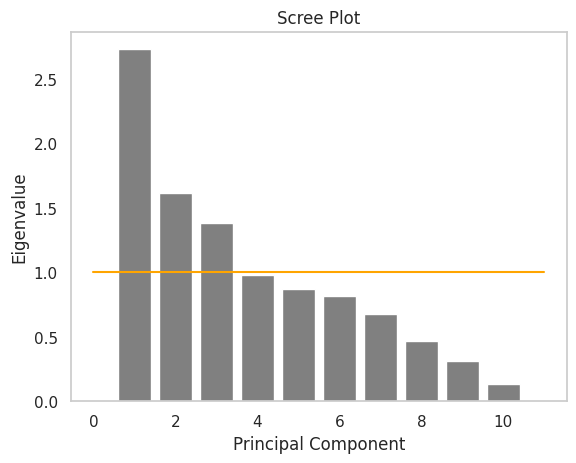

In [ ]:
# 10 song features for analysis
selected_features = ['duration', 'danceability', 'energy', 'loudness', 'speechiness',
                     'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

song_features = df[selected_features]

# Z-score normalization
zscored_song_features = stats.zscore(song_features)

# Perform PCA
pca = PCA().fit(zscored_song_features)

# Extract Eigenvalues
eigVals = pca.explained_variance_

# Loadings
loadings = pca.components_

# Rotate the data
pca.fit_transform(zscored_song_features)

# Calculate variance explained by each principal component
varE = eigVals / sum(eigVals) * 100

# Display variance explained by each principal component
for component, explained_variance in enumerate(varE, 1):
    print(f"Variance explained by PC{component}: {explained_variance:.2f}%")

# Making a scree plot
num_features = len(selected_features)
x = np.arange(1, num_features + 1)
plt.bar(x, eigVals, color='gray')
plt.plot([0, num_features + 1], [1, 1], color='orange')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')
plt.grid(False)
plt.show()

Number of components selected by Kaiser criterion: 3


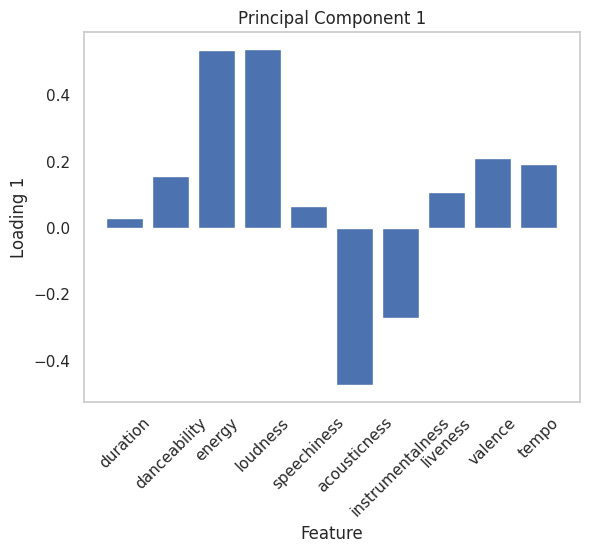

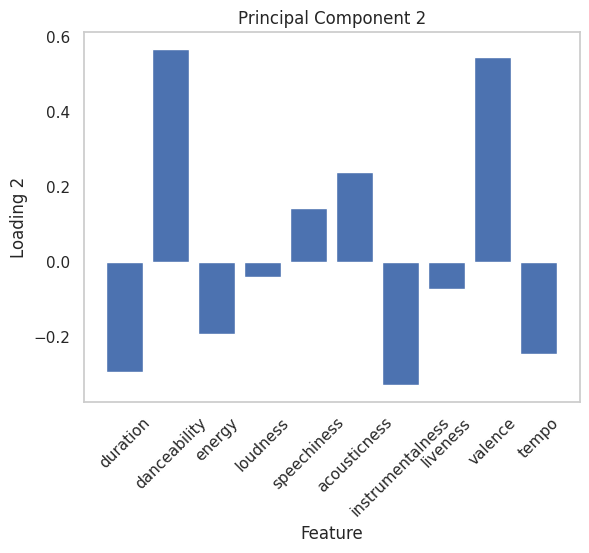

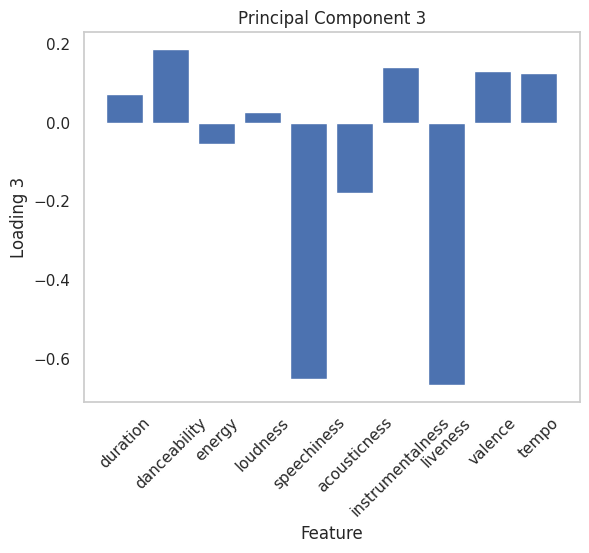

In [ ]:
# Determine meaningful principal components based on criteria
kaiser_threshold = 1  # Kaiser criterion
elbow_components = np.count_nonzero(eigVals > kaiser_threshold)
print(f"Number of components selected by Kaiser criterion: {elbow_components}")

whichPrinicpalComponent = 0
plt.bar(selected_features, loadings[whichPrinicpalComponent, :] * -1)
plt.xlabel('Feature')
plt.ylabel('Loading 1')
plt.title('Principal Component 1')
plt.xticks(rotation=45)
plt.grid(False)
plt.show()

whichPrinicpalComponent = 1
plt.bar(selected_features, loadings[whichPrinicpalComponent, :] * -1)
plt.xlabel('Feature')
plt.ylabel('Loading 2')
plt.title('Principal Component 2')
plt.xticks(rotation=45)
plt.grid(False)
plt.show()

whichPrinicpalComponent = 2
plt.bar(selected_features, loadings[whichPrinicpalComponent, :] * -1)
plt.xlabel('Feature')
plt.ylabel('Loading 3')
plt.title('Principal Component 3')
plt.xticks(rotation=45)
plt.grid(False)
plt.show()

In [ ]:
principalComponents = loadings[:3] # Each principal component

for i, j in enumerate(principalComponents):
    print(f"Principal Component {i+1}:")
    print(j)
    print()

Principal Component 1:
[-0.0289646  -0.15489327 -0.53681845 -0.53910768 -0.06717802  0.47421507
  0.27102176 -0.10909961 -0.20976983 -0.19392335]

Principal Component 2:
[ 0.292382   -0.56871842  0.1914362   0.0394423  -0.14409578 -0.24043801
  0.32831717  0.07063512 -0.54877415  0.24568279]

Principal Component 3:
[-0.07276386 -0.18769398  0.05412883 -0.02858797  0.65154856  0.17981048
 -0.14126909  0.66758838 -0.13213563 -0.12566158]



9) Can you predict whether a song is in major or minor key from valence? If so, how good is this prediction? If not, is there a better predictor? [Suggestion: It might be nice to show the logistic regression once you are done building the model]

Accuracy:  0.619423076923077
Test AUC: 0.500681068480768


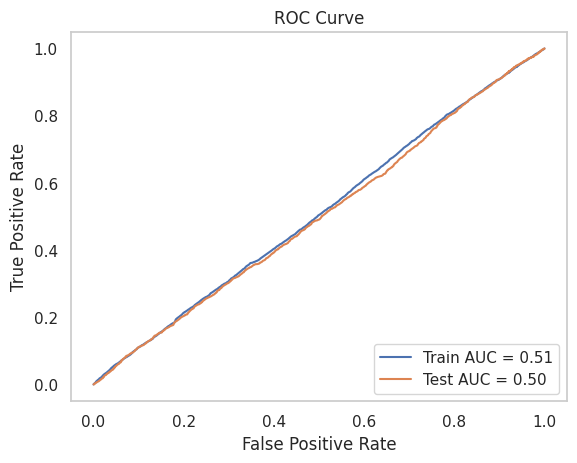

In [ ]:
# Define features (X) and target variable (Y)
X = df[['valence']]   # Feature: Valence
y = df['mode']        # Target variable: Mode (major/minor)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Calculate accuracy
y_pred_valence = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_valence)

print("Accuracy: ", accuracy)

# Predict probabilities
train_probabilities = model.predict_proba(X_train)[:, 1]
test_probabilities = model.predict_proba(X_test)[:, 1]

# Calculate AUC
train_auc = roc_auc_score(y_train, train_probabilities)
test_auc = roc_auc_score(y_test, test_probabilities)

print("Test AUC:", test_auc)

# Plot ROC curve
train_fpr, train_tpr, _ = roc_curve(y_train, train_probabilities)
test_fpr, test_tpr, _ = roc_curve(y_test, test_probabilities)

plt.plot(train_fpr, train_tpr, label='Train AUC = {:.2f}'.format(train_auc))
plt.plot(test_fpr, test_tpr, label='Test AUC = {:.2f}'.format(test_auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(False)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


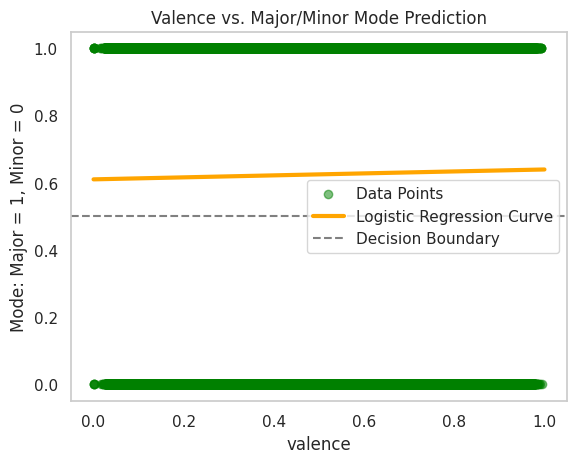

In [ ]:
# Plot logistic regression for predicitng major/minor mode

# X values
x_val = np.linspace(0, 1, 100).reshape(-1, 1)

# Y values
y_val = model.predict_proba(x_val)[:, 1]

# Plot logistic regression curve
plt.scatter(X, y, color = 'green', alpha = 0.5, label = 'Data Points')
plt.plot(x_val, y_val, color = 'orange', linewidth = 3, label='Logistic Regression Curve')
plt.xlabel('valence')
plt.ylabel('Mode: Major = 1, Minor = 0')
plt.axhline(y = 0.5, color = 'gray', linestyle = '--', label = "Decision Boundary")
plt.legend()
plt.title('Valence vs. Major/Minor Mode Prediction')
plt.grid(False)
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score

# Dictionary to store AUC scores for each feature
aurocScores = {}

# Iterate through each feature
for feature in selected_features:
    X = df[[feature]]   # Feature
    y = df['mode']      # Target variable: Mode (major or minor)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the logistic regression model
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # Predict probabilities
    train_probabilities = model.predict_proba(X_train)[:, 1]
    test_probabilities = model.predict_proba(X_test)[:, 1]

    # Calculate AUC
    train_auc = roc_auc_score(y_train, train_probabilities)
    test_auc = roc_auc_score(y_test, test_probabilities)

    # Store the test AUC score for the current feature
    aurocScores[feature] = test_auc

    print(f"Feature: {feature}")
    print("Test AUC:", test_auc)

# Find the best feature based on the highest test AUC score
bestFeature = max(aurocScores, key=aurocScores.get)
bestScore = aurocScores[bestFeature]

print("Best Feature:", bestFeature)
print("Best Test AUC Score:", bestScore)



Feature: duration
Test AUC: 0.490304299616636
Feature: danceability
Test AUC: 0.5518890213117899
Feature: energy
Test AUC: 0.5489876119308623
Feature: loudness
Test AUC: 0.5306242753192909
Feature: speechiness
Test AUC: 0.5702059807111586
Feature: acousticness
Test AUC: 0.5514625078380431
Feature: instrumentalness
Test AUC: 0.5346514449531318
Feature: liveness
Test AUC: 0.49989453841554893
Feature: valence
Test AUC: 0.500681068480768
Feature: tempo
Test AUC: 0.50765502460718
Best Feature: speechiness
Best Test AUC Score: 0.5702059807111586


10) Which is a better predictor of whether a song is classical music – duration or the principal components you extracted in question 8? [Suggestion: You might have to convert the qualitative genre label to a binary numerical label (classical or not)]

In [ ]:
# Convert qualitative genre label to a binary numerical label

df['is_classical'] = df['track_genre'].apply(lambda x: 1 if x == 'classical' else 0) # Convert to binary 0 (else) or 1 (classical)

# Define features and target variables
features = ['duration', 'danceability', 'energy', 'loudness', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# Reshape the input data
X_duration = df['duration'].values.reshape(-1, 1)  # Features
y = df['is_classical']  # Target variable for classical

# Split the data into training and testing sets
X_train_duration, X_test_duration, y_train, y_test = train_test_split(X_duration, y, test_size=0.2, random_state = 42)

# Train logistic regression model for duration
model_duration = LogisticRegression()
model_duration.fit(X_train_duration, y_train)

y_pred_duration = model_duration.predict(X_test_duration)

accuracy_duration = accuracy_score(y_test, y_pred_duration)

# Predict probabilities
test_probabilities_duration = model_duration.predict_proba(X_test_duration)[:, 1]

# Calculate AUC
test_auc_duration = roc_auc_score(y_test, test_probabilities_duration)

print("Accuracy when using duration as a predictor:", accuracy_duration)
print("ROC AUC when using duration as a predictor:", test_auc_duration)

Accuracy when using duration as a predictor: 0.9811538461538462
ROC AUC when using duration as a predictor: 0.5582064656517253


In [ ]:
X_d = df[features]  # Features
y = df['is_classical']  # Target variable for classical

pca =  PCA(n_components = 3)
X_pca = pca.fit_transform(zscored_song_features)

X_train_pca, X_test_pca, y_train, y_test  = train_test_split(X_pca, y, test_size=0.2, random_state=42)
model_pca = LogisticRegression()
model_pca.fit(X_train_pca, y_train)

y_pred_pca = model_pca.predict(X_test_pca)

# Evaluate the models

test_accuracy_pca = accuracy_score(y_test, y_pred_pca )
test_auc_pca = roc_auc_score(y_test, model_pca.predict_proba(X_test_pca)[:, 1])

print("PCA Logistic Regression Test Accuracy:", test_accuracy_pca)
print("PCA Logistic Regression Test AUC:", test_auc_pca)



PCA Logistic Regression Test Accuracy: 0.9801923076923077
PCA Logistic Regression Test AUC: 0.9404150233201866


In [ ]:
duplicate_names_count = df[df['album_name'] == df['track_name']].shape[0]
total_records = df.shape[0]
percentage_duplicates = (duplicate_names_count / total_records) * 100
print(f"Percentage of instances where album name matches track name: {percentage_duplicates:.2f}%")

# Count instances where multiple tracks have the same album name
multiple_tracks_same_album = df.groupby(['album_name']).size()
multiple_tracks_same_album = multiple_tracks_same_album[multiple_tracks_same_album > 1]

In [ ]:
# Calculate the percentage of instances where album name is the same but track names are different
duplicate_album_track_count = df.groupby(['album_name', 'track_name']).size().reset_index(name='count')
duplicate_album_track_count = duplicate_album_track_count[duplicate_album_track_count['count'] > 1]

total_records = df.shape[0]
total_duplicate_album_track_records = duplicate_album_track_count.shape[0]
percentage_duplicate_album_track = (total_duplicate_album_track_records / total_records) * 100

print(f"Percentage of instances where album name is the same but track names are different: {percentage_duplicate_album_track:.2f}%")
